In [ ]:
With rm(list = ls()) command we restart the console and delete every file and object within the project.
rm(list = ls())

# Basic librearies for the analysis

# If packages are not installed we can type and run the next line of code before calling the packages
#install.packages('mlbench')
require(mlbench) # requiere instalación
#install.packages("corrplot")
require(corrplot) # requiere instalación
require(MASS)

In [ ]:
data("BostonHousing") # dataset built in (does not requiere to upload a file, it comes with R)
?BostonHousing # checking the data
dataframe <- BostonHousing # assign the object "BostonHousing" to other object called dataframe

Features of the dataset:

- crim = rate of crimes per city
- zn = proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados
- indus = proporción de negocios tipo no-retail por ciudad
- chas = Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
- nox = concentración de óxido nítrico (partes por 10 millones)
- rm = promedio de habitaciones por vivienda
- age = proporción de unidades ocupadas por sus dueños construídas antes de 1940
- dis = distancia ponderada a cinco centros de empleo en bostón
- rad = índice de accesibilidad a carreteras
- tax = impuesto
- ptratio = profesorado por ciudad
- b = índice de población
- lstat = íncide de estatus de la población por ciudad
- medv = valor medio de viviendas en 1.000 USD

In [ ]:
# Visualización de las primeras 10 filas del dataframe
head(dataframe, n = 10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [ ]:
# Número de filas del dataframe
nrow(dataframe)

[1] 506

In [ ]:
# Estructura del dataframe
str(dataframe)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
# Una de las variables es de tipo factor
unique(dataframe$chas)

[1] 0 1
Levels: 0 1

In [ ]:
# Revisión si existen NA values por columna
colSums(is.na(dataframe)) > 0

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
  FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE   FALSE 
ptratio       b   lstat    medv 
  FALSE   FALSE   FALSE   FALSE

In [ ]:
# Resumen del dataframe
summary(dataframe)

      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

In [ ]:
# Manipulación y slicing

# Slicing horizontal
head(dataframe[dataframe$chas == 1,],5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
143,3.32105,0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
153,1.12658,0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
155,1.41385,0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
156,3.53501,0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
161,1.27346,0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0


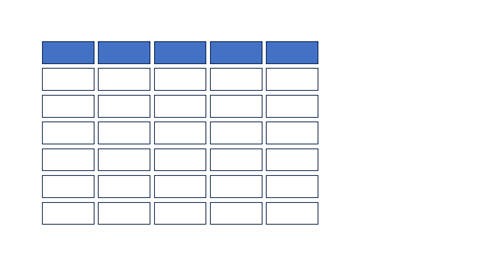

In [ ]:
# Slicing vertical
head(dataframe[,c("chas","nox","medv")], 5)

,chas,nox,medv
,<fct>,<dbl>,<dbl>
1,0,0.538,24.0
2,0,0.469,21.6
3,0,0.469,34.7
4,0,0.458,33.4
5,0,0.458,36.2


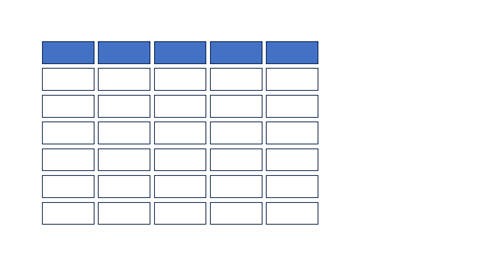

In [ ]:
# Correlaciones
cor(dataframe[,-4])

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.0000000,-0.2004692,0.4065834,0.4209717,-0.2192467,0.3527343,-0.3796701,0.6255051,0.5827643,0.2899456,-0.3850639,0.4556215,-0.3883046
zn,-0.2004692,1.0000000,-0.5338282,-0.5166037,0.3119906,-0.5695373,0.6644082,-0.3119478,-0.3145633,-0.3916785,0.1755203,-0.4129946,0.3604453
indus,0.4065834,-0.5338282,1.0000000,0.7636514,-0.3916759,0.6447785,-0.7080270,0.5951293,0.7207602,0.3832476,-0.3569765,0.6037997,-0.4837252
nox,0.4209717,-0.5166037,0.7636514,1.0000000,-0.3021882,0.7314701,-0.7692301,0.6114406,0.6680232,0.1889327,-0.3800506,0.5908789,-0.4273208
rm,-0.2192467,0.3119906,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.2052462,-0.2098467,-0.2920478,-0.3555015,0.1280686,-0.6138083,0.6953599
age,0.3527343,-0.5695373,0.6447785,0.7314701,-0.2402649,1.0000000,-0.7478805,0.4560225,0.5064556,0.2615150,-0.2735340,0.6023385,-0.3769546
dis,-0.3796701,0.6644082,-0.7080270,-0.7692301,0.2052462,-0.7478805,1.0000000,-0.4945879,-0.5344316,-0.2324705,0.2915117,-0.4969958,0.2499287
rad,0.6255051,-0.3119478,0.5951293,0.6114406,-0.2098467,0.4560225,-0.4945879,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763,-0.3816262
tax,0.5827643,-0.3145633,0.7207602,0.6680232,-0.2920478,0.5064556,-0.5344316,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934,-0.4685359
ptratio,0.2899456,-0.3916785,0.3832476,0.1889327,-0.3555015,0.2615150,-0.2324705,0.4647412,0.4608530,1.0000000,-0.1773833,0.3740443,-0.5077867


Coeficiente de correlación de pearson

$$ \rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$

Donde:

- cov es la covarianza entre las variables
- $\sigma_i$ es la desviación estándar de la variable $i, \forall i \in \{ X,Y\}$



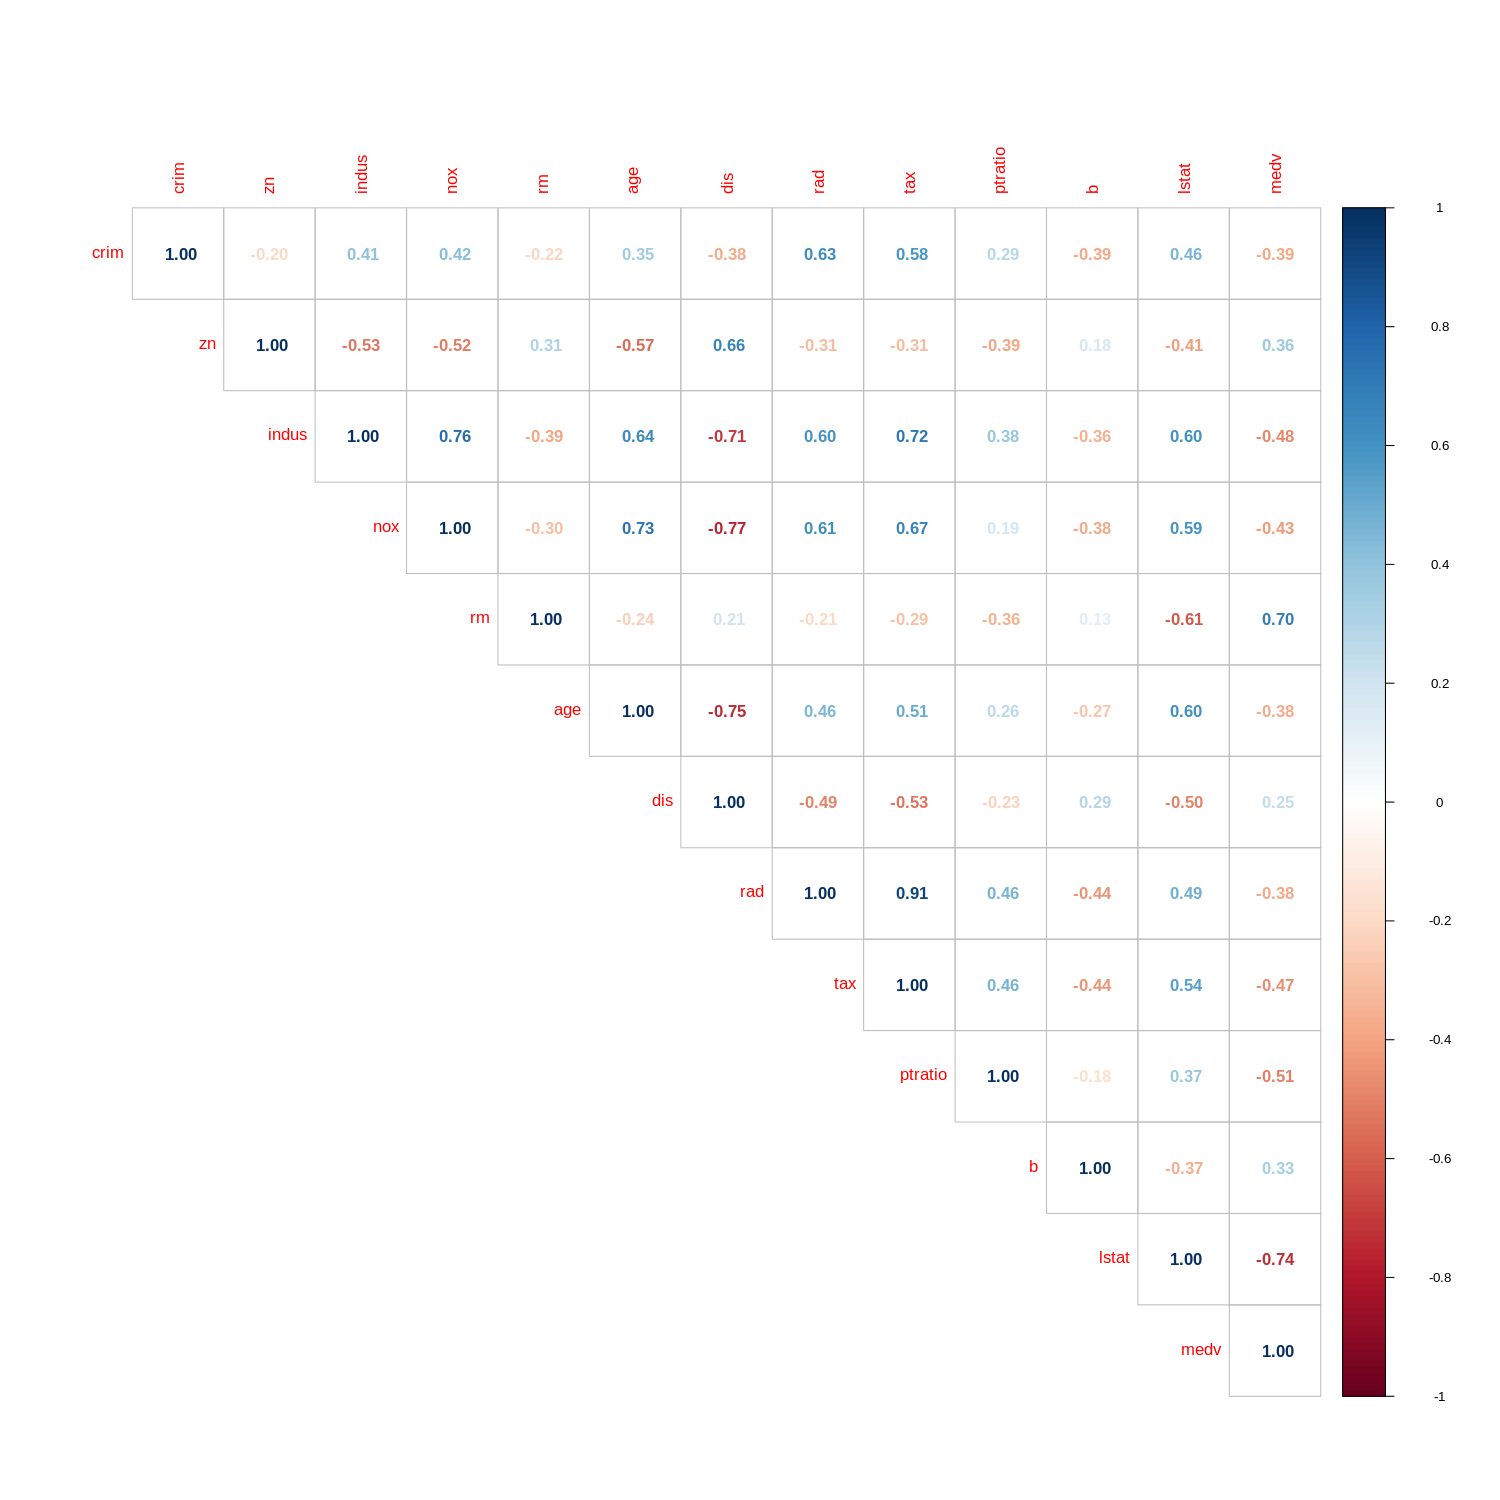

In [ ]:
# Improving visualization

# Cambiamos el tamaño de la visualización (solo colab y jupyter)
options(repr.plot.width = 15, repr.plot.height = 15, repr.plot.res = 100)

corrplot(cor(dataframe[,-4]), # objeto con correlaciones (matriz)
          method = 'number', # Método para desplegar números
          type = 'upper',  # Tipo diagonal superior
          number.cex=1, # tamaño del texto (números)
          tl.cex=1 # Tamaño del texto en los márgenes
          )

In [ ]:
# install.packages("Hmisc")
require(Hmisc)

hist.data.frame(dataframe) # Visualiza todas las variables en el dataframe

In [ ]:
# Visualizaciones entre variables
plot(x = dataframe$lstat, y = dataframe$medv)
plot(x = dataframe$lstat, y = dataframe$medv,
      pch = 19) # Cambiamos los puntos
plot(x = dataframe$lstat, y = dataframe$medv,
      pch = 19, # Cambiamos los puntos
      xlab = "lstat", # Nombre del eje X
      ylab = "medv") # Nombre del eje Y

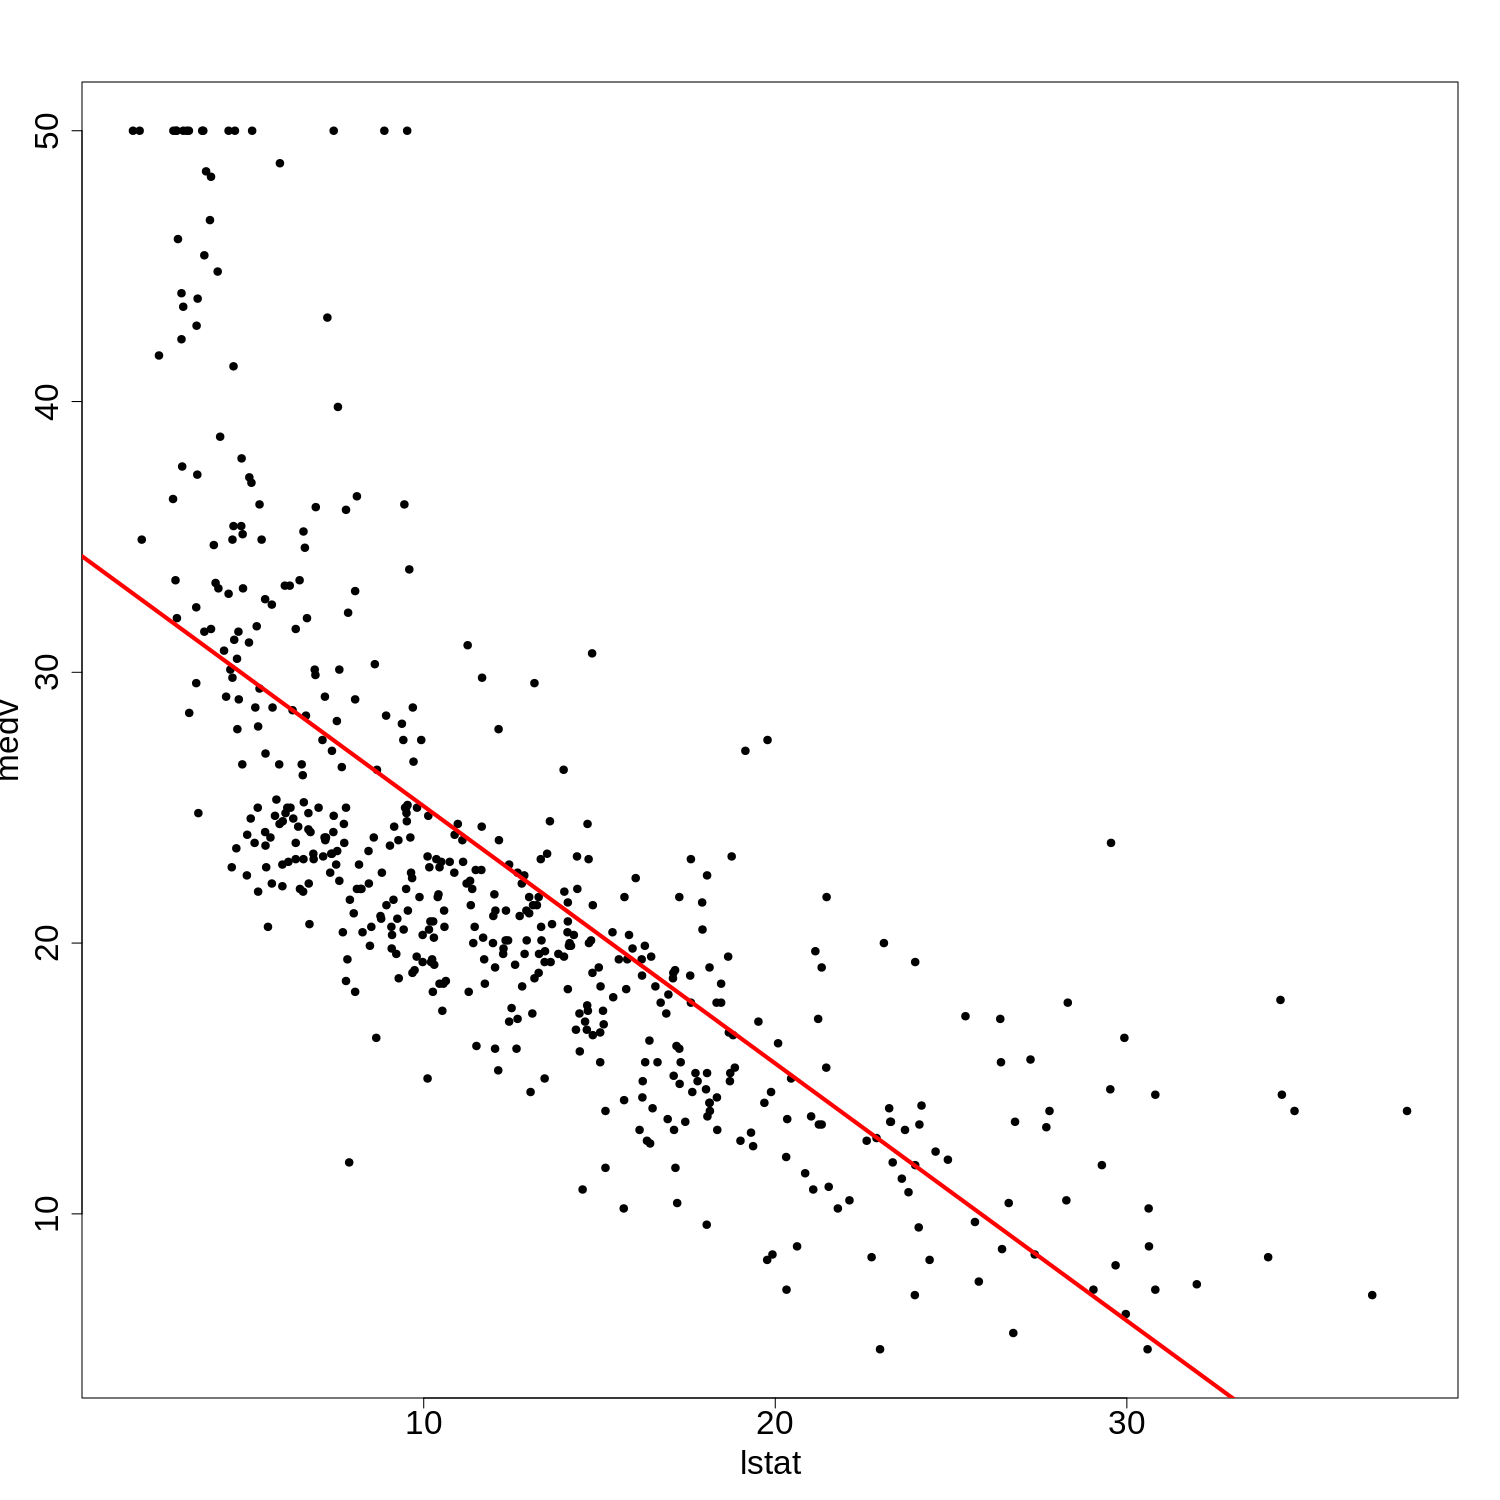

In [ ]:
plot(x = dataframe$lstat, y = dataframe$medv,
      pch = 19, # Cambiamos los puntos
      xlab = "lstat",
      ylab = "medv",
      cex.lab = 2,
      cex.main = 2,
      cex.axis = 2) # Nombre del eje X
abline(lm(medv ~ lstat, data = dataframe))
abline(lm(medv ~ lstat, data = dataframe), col = "red", lwd = 4) # Cambio en la linea de regresión

In [ ]:
plot(x = dataframe$rm, y = dataframe$medv,
      pch = 19, # Cambiamos los puntos
      xlab = "rm",
      ylab = "lstat",
      cex.lab = 2,
      cex.main = 2,
      cex.axis = 2) # Nombre del eje X
abline(lm(medv ~ rm, data = dataframe), col = "red", lwd = 4) # Cambio en la linea de regresión

In [ ]:
# Regresión
porc <- 0.75
train <- sample(1:nrow(dataframe), size = nrow(dataframe) * porc, replace = FALSE) # Índices de las filas que dejaremos en el conjunto de entrenamiento
train.df <- dataframe[train,]
test.df <- dataframe[-train,]

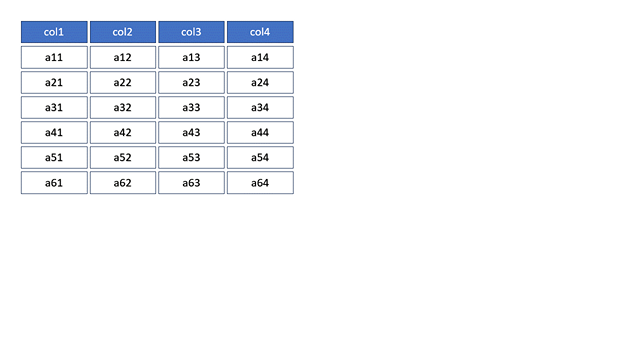

In [ ]:
# Modelo
mi_modelo <- lm(medv ~ ., data = train.df) # Ajuste (función lm())
summary(mi_modelo) # Resumen del modelo


Call:
lm(formula = medv ~ ., data = train.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8967  -2.7947  -0.6523   1.6652  24.4151 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.987e+01  5.782e+00   6.896 2.37e-11 ***
crim        -8.958e-02  3.954e-02  -2.266  0.02406 *  
zn           3.585e-02  1.646e-02   2.178  0.03005 *  
indus       -8.693e-04  7.200e-02  -0.012  0.99037    
chas1        4.373e+00  1.032e+00   4.239 2.85e-05 ***
nox         -1.779e+01  4.322e+00  -4.117 4.76e-05 ***
rm           3.550e+00  4.612e-01   7.697 1.31e-13 ***
age          9.521e-04  1.437e-02   0.066  0.94720    
dis         -1.657e+00  2.241e-01  -7.391 1.00e-12 ***
rad          3.434e-01  8.460e-02   4.059 6.03e-05 ***
tax         -1.386e-02  4.894e-03  -2.833  0.00487 ** 
ptratio     -9.376e-01  1.493e-01  -6.278 9.72e-10 ***
b            9.994e-03  2.974e-03   3.361  0.00086 ***
lstat       -6.000e-01  5.543e-02 -10.824  < 2e-16 ***
---
Signi

Modelo queda de la siguiente forma

$$ \hat{y} = \beta_0 + \sum_{i=1}^n \beta_i x_i + \epsilon $$

$$ \hat{y} = 34.29 - 0.11 \times \text{crim} + 0.05 \times \text{zn} + 0.02 \times \text{indus} + 2.77 \times \text{chas1} - 15.38 \times \text{nox} \hspace{0.1cm} + ... -0.62 \times \text{lstat} $$

In [ ]:
# Prueba de errores
test.df$Prediction <- predict(mi_modelo, newdata = test.df)

MAPE - Mean Absolute Percentage Error

$$ \frac{1}{n} \sum_{i=1}^{n} \biggl{|} \frac{Y_i - \hat{Y}_i}{Y_i} \biggl{|} $$

In [ ]:
# MAPE
mean(abs(test.df$Prediction - test.df$medv) / test.df$medv)

[1] 0.1771046

MAE - Mean Absolute Error

$$ \frac{1}{n} \sum_{i=1}^{n} | Y_i - \hat{Y}_i | $$

In [ ]:
# MAE
mean(abs(test.df$Prediction - test.df$medv))

[1] 3.957012

RMSE - Root Mean Square Error

$$ \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

In [ ]:
# RMSE
sqrt(mean((test.df$Prediction - test.df$medv)^2))

[1] 4.731042

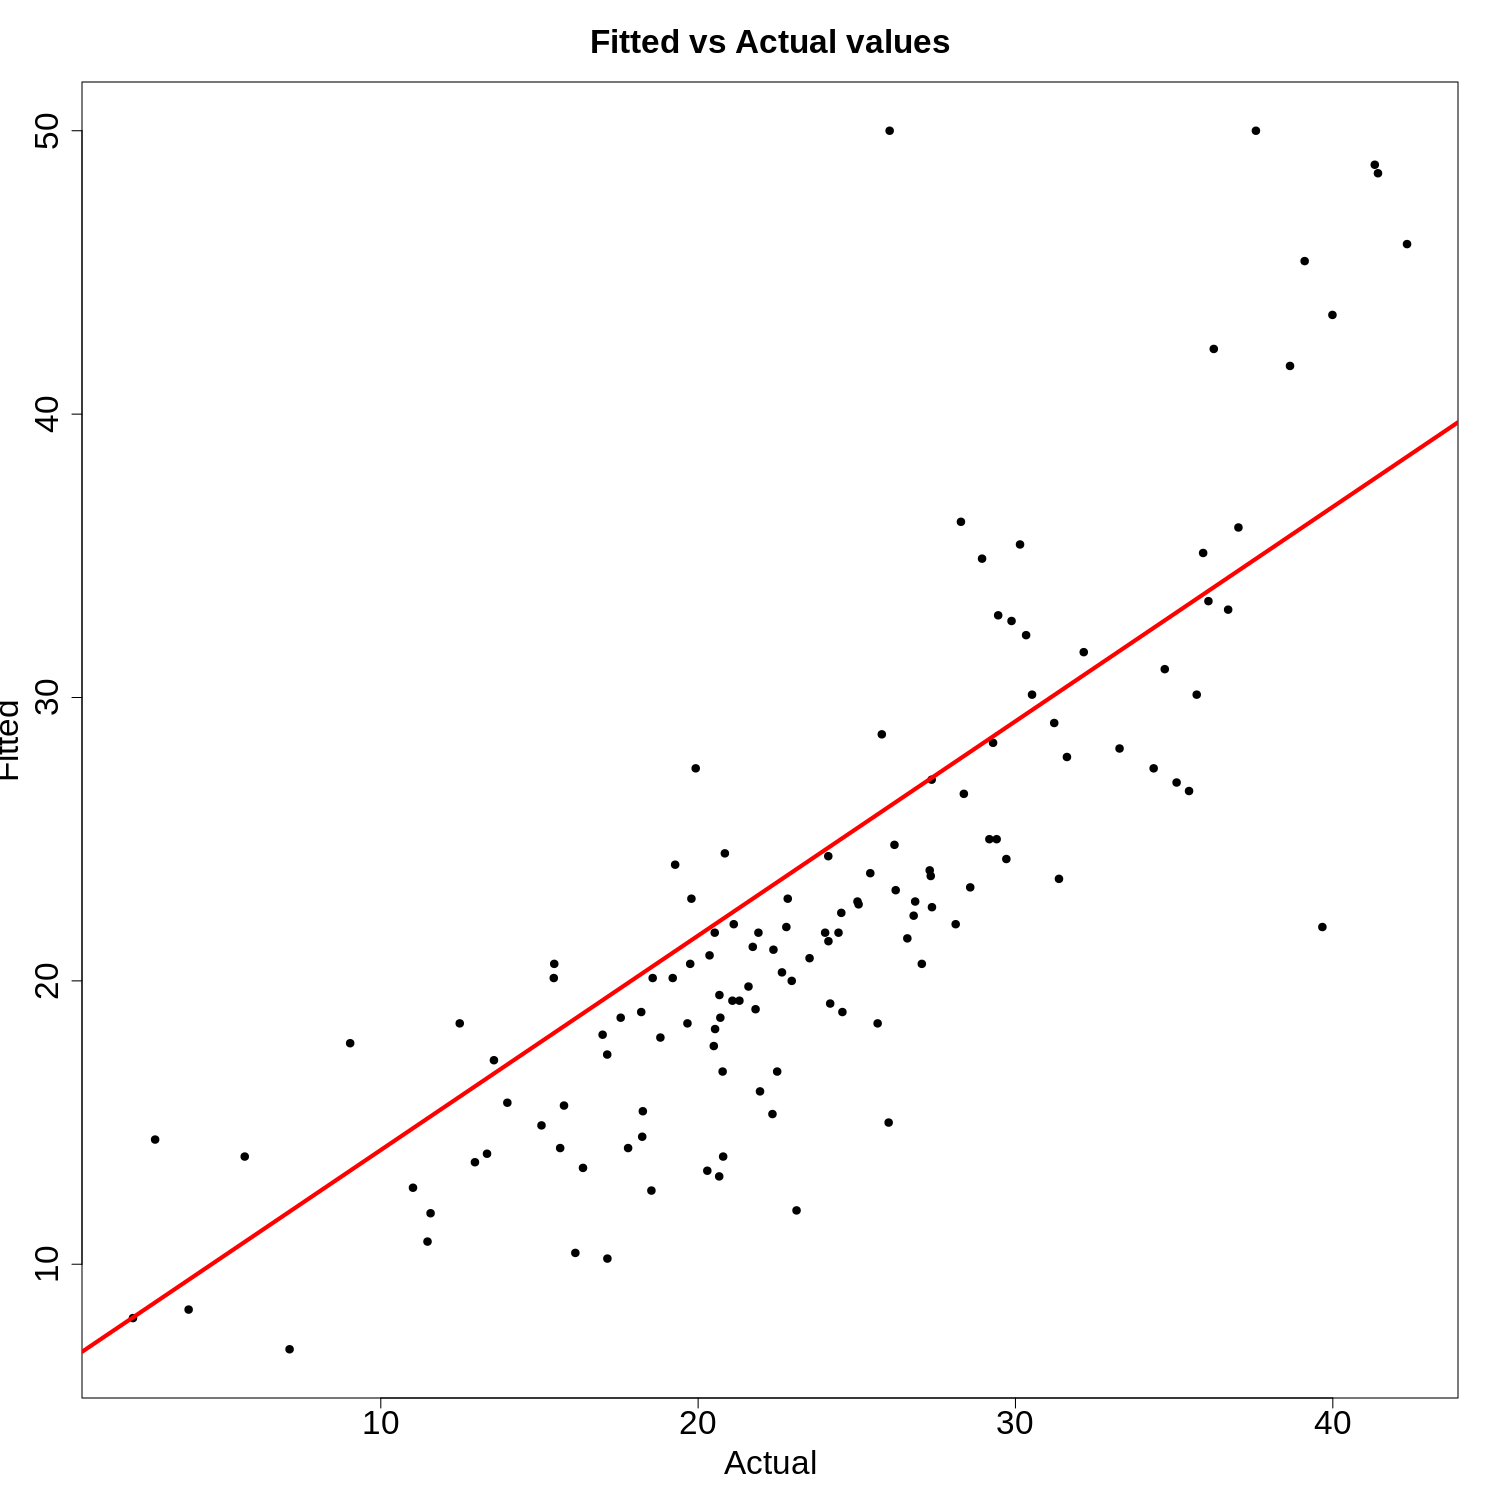

In [ ]:
# Graficamos los valores ajustados por el modelo y valores reales
plot(x = test.df$Prediction,
y = test.df$medv,
pch = 19,
main = 'Fitted vs Actual values', ylab = "Fitted", xlab = "Actual", cex.lab = 2, cex.main = 2, cex.axis = 2)
abline(lm(Prediction ~ medv, data = test.df), col = "red", lwd = 4)

In [ ]:
?plot